In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/dulieuxettuyendaihoc.csv')
df.head()

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [ ]:
df.head(10)  # Xem 10 dòng đầu tiên
df.tail(10)  # Xem 10 dòng cuối cùng
df.columns   # Liệt kê tên các cột
df.dtypes    # Kiểm tra kiểu dữ liệu của từng cột
df.shape     # Kiểm tra số hàng và số cột của DataFrame
df.index     # Hiển thị thông tin về index
df.info()    # Thông tin tổng quát về tập dữ liệu (số lượng non-null, kiểu dữ liệu)
df.describe()  # Thống kê mô tả
df.isnull().sum()  # Kiểm tra dữ liệu thiếu
df['T1'].value_counts()  # Đếm số lần xuất hiện của các giá trị
df['T1'].unique()  # Liệt kê các giá trị duy nhất
df['T1'].nunique()  # Đếm số giá trị duy nhất
df['T1'].mean()  # Tính giá trị trung bình
df['T1'].median()  # Tính trung vị
df['T1'].mode()  # Tính mode
df['T1'].std()  # Tính độ lệch chuẩn
df['T1'].var()  # Tính phương sai
df['T1'].sum()  # Tính tổng

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSV                 100 non-null    object 
 1   GT                   100 non-null    object 
 2   DT                   3 non-null      float64
 3   KV                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   KT                   100 non-null    object 
 8   NGAYTHI              100 non-null    object 
 9   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(6)
memory usage: 7.9+ KB


In [9]:

df.rename(columns={'NGAYTHI': 'NT', 'DINHHUONGNGHENGHIEP': 'NGHE'}, inplace=True)


In [10]:
df.head()

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


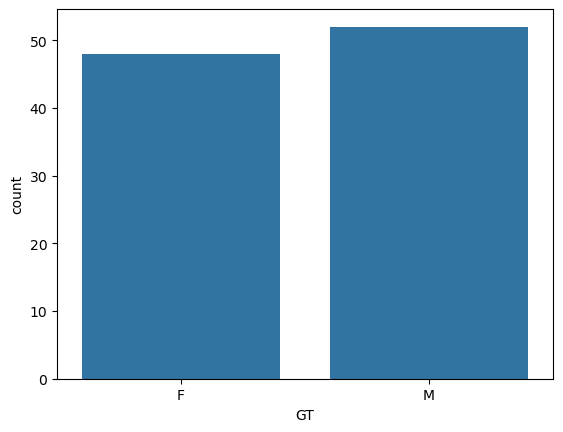

In [14]:
sns.countplot(x='GT', data=df)
plt.show()

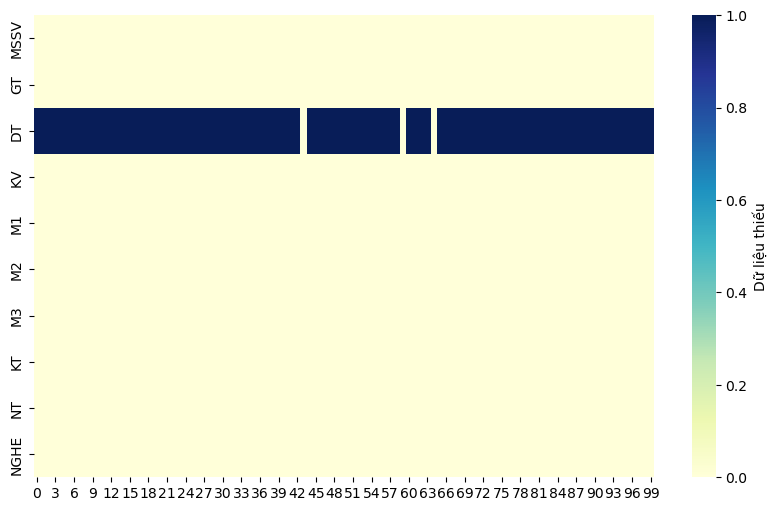

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()


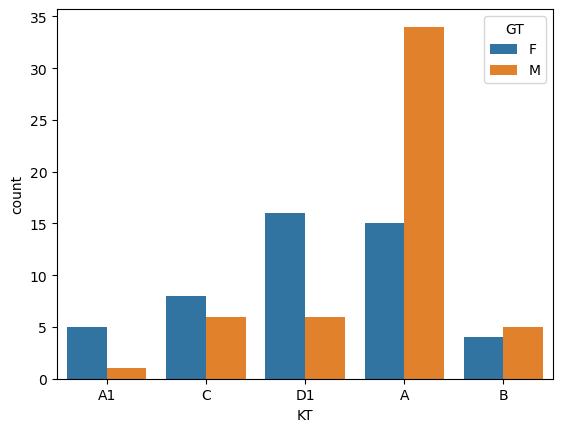

In [18]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()


In [19]:
cv_by_gender = df.groupby('GT')[['M1','M2','M3']].std() / df.groupby('GT')[['M1','M2','M3']].mean()
print(cv_by_gender)

          M1        M2        M3
GT                              
F   0.349905  0.252518  0.192854
M   0.411677  0.240146  0.233215


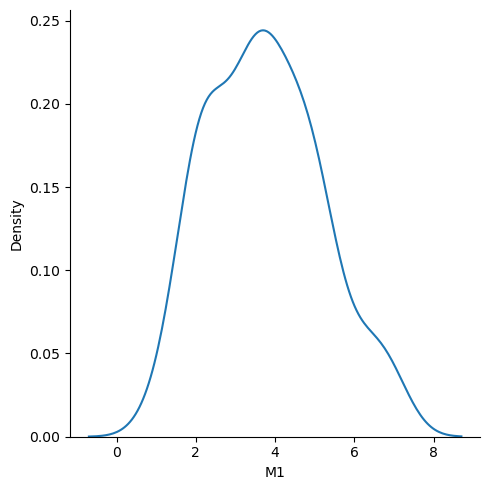

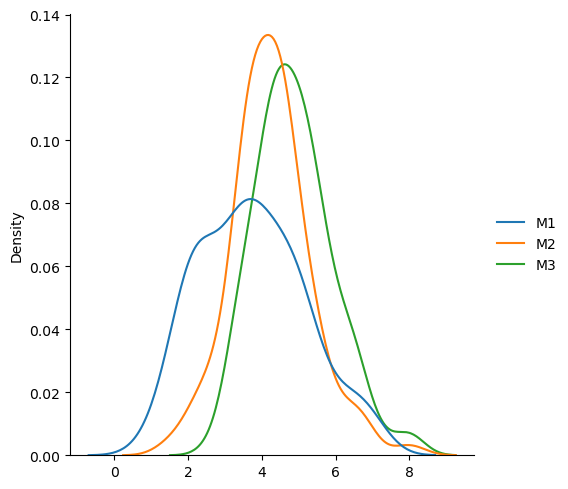

In [20]:
sns.displot(df, x='M1', kind='kde')
plt.show()
sns.displot(data=df[['M1','M2','M3']], kind='kde')
plt.show()

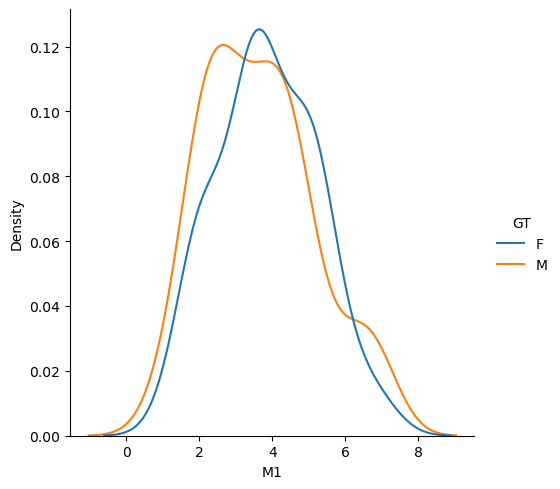

In [21]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

In [22]:
print(df['M1'].skew())
print(df[['M1','M2','M3']].skew())
print(df['M1'].kurtosis())
print(df[['M1','M2','M3']].kurtosis())

0.33322084231625376
M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64
-0.517003797550498
M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64


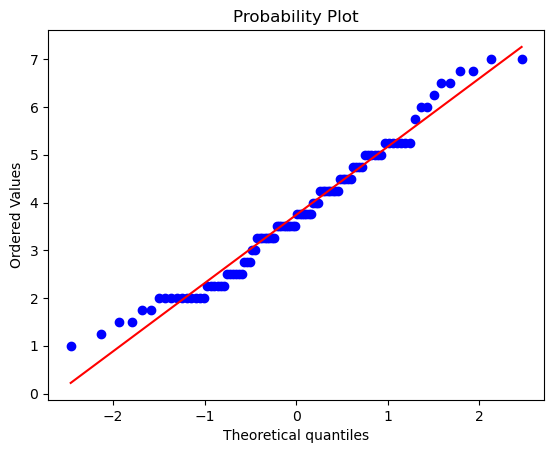

In [23]:
from scipy import stats
stats.probplot(df['M1'], plot=sns.mpl.pyplot)
plt.show()

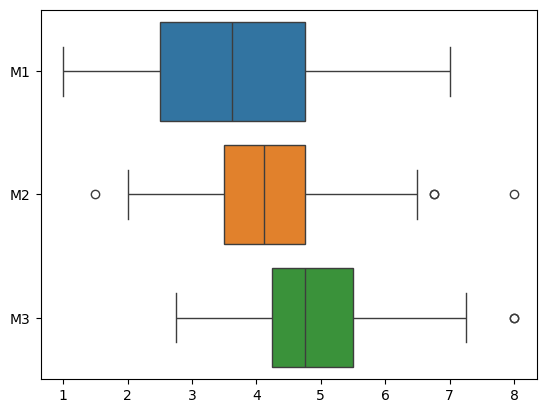

In [24]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

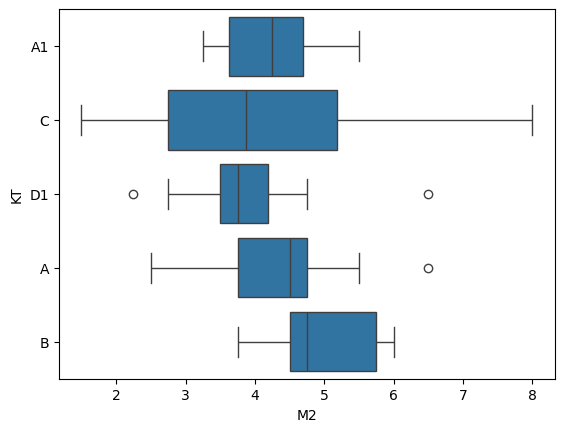

In [25]:
sns.boxplot(x='M2', y='KT', data=df, orient='h')
plt.show()

In [26]:
print(df[['M1','M2','M3']].cov())

          M1        M2        M3
M1  2.028939  0.053081  0.027778
M2  0.053081  1.123712 -0.101010
M3  0.027778 -0.101010  1.083965


In [27]:
print(df[['M1','M2','M3']].corr())

          M1        M2        M3
M1  1.000000  0.035154  0.018731
M2  0.035154  1.000000 -0.091523
M3  0.018731 -0.091523  1.000000


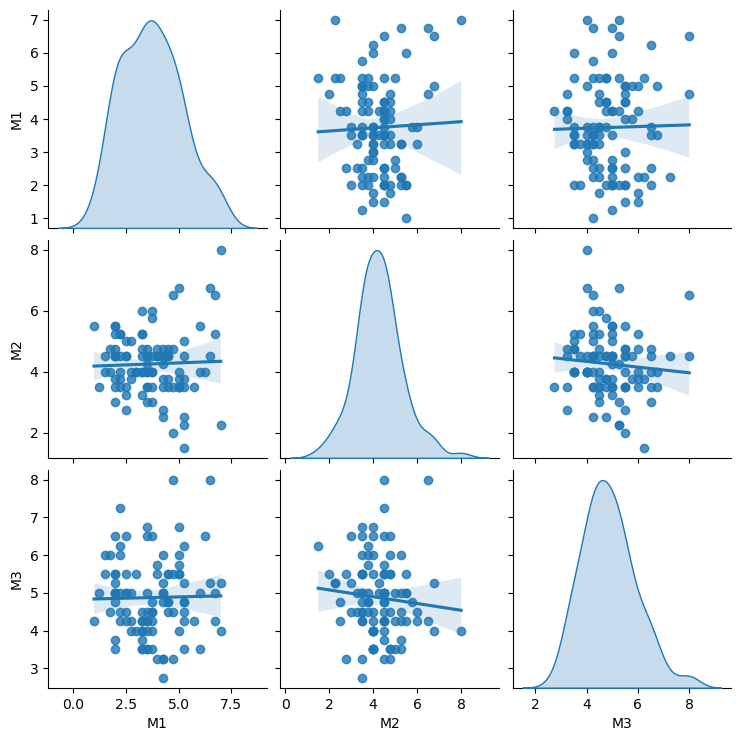

In [29]:
sns.pairplot(df[['M1','M2','M3']], diag_kind='kde', kind='reg')
plt.show()

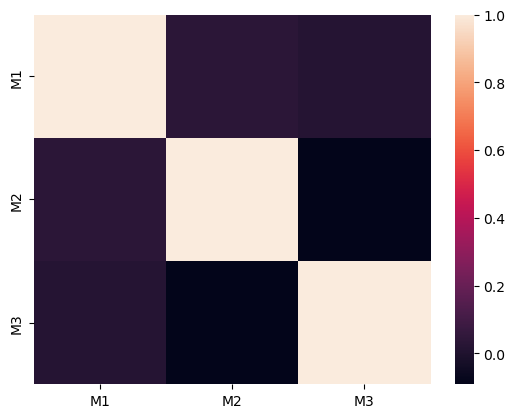

In [ ]:
sns.heatmap(df[['M1','M2','M3']].corr())
plt.show()

In [32]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000
